In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [3]:
DATA_DIR = "../../data/"
DATA_NAME = "pincher Creek Data 2011 2024.xlsx"

# Load data
df_orginal = pd.read_excel(os.path.join(DATA_DIR, DATA_NAME))

In [41]:
df_orginal.head(640)

,Year,Month,Day,Time (UTC),Temp,RelHum,Wind Dir (10s deg),Wind Spd (km/h),Stn Press (kPa),Hmdx
0,2011,06,01,00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
1,2011,06,01,01:00:00,NaN,NaN,NaN,NaN,NaN,NaN
2,2011,06,01,02:00:00,NaN,NaN,NaN,NaN,NaN,NaN
3,2011,06,01,03:00:00,NaN,NaN,NaN,NaN,NaN,NaN
4,2011,06,01,04:00:00,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
635,2011,06,27,11:00:00,NaN,NaN,NaN,NaN,NaN,NaN
636,2011,06,27,12:00:00,NaN,NaN,NaN,NaN,NaN,NaN
637,2011,06,27,13:00:00,NaN,NaN,NaN,NaN,NaN,NaN
638,2011,06,27,14:00:00,7.9,85.0,32.0,9.0,88.14,NaN


In [ ]:
df_orginal.columns

In [4]:
df_orginal.tail()

,Year,Month,Day,Time (UTC),Temp,Dew Point Temp (°C),RelHum,Precip. Amount (mm),Wind Dir (10s deg),Wind Spd (km/h),...,Temp-Delta,Unnamed: 21,Unnamed: 22,Foehn,Foehn.1,Unnamed: 25,Other Stations,Unnamed: 27,Unnamed: 28,Unnamed: 29
119113,X,X,X,X,X,X,X,X,X,X,...,X,X,X,X,X,X,X,X,X,X
119114,NaN,NaN,NaN,NaN,36.5,20.9,100,NaN,NaN,102,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
119115,NaN,NaN,NaN,NaN,-40,-43.7,8,NaN,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
119116,NaN,NaN,NaN,NaN,5.428413,-1.812867,64.193141,NaN,NaN,21.405584,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
119117,NaN,NaN,NaN,NaN,11.162565,8.757744,20.664881,NaN,NaN,13.910578,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.iloc[1000:1005]

In [5]:
clmns = ['Year', 'Month', 'Day', 'Time (UTC)', 'Temp', 
       'RelHum', 'Wind Dir (10s deg)',
       'Wind Spd (km/h)', 'Stn Press (kPa)', 'Hmdx',]
df_orginal = df_orginal[clmns]

In [ ]:
df.iloc[1000:1005]

In [6]:
df_orginal.isnull().sum()

Year                       5
Month                      5
Day                        5
Time (UTC)                 5
Temp                    1190
RelHum                  1132
Wind Dir (10s deg)     11295
Wind Spd (km/h)         5928
Stn Press (kPa)         1233
Hmdx                  114379
dtype: int64

In [7]:
df_orginal.shape

(119118, 10)

In [ ]:
print(df.columns)
print(df.head())
print(df.tail())
print(df.dtypes)
print(df.isna().sum())

In [8]:

# Mark rows with 'X' in ANY column
mask_x = df_orginal.apply(lambda row: row.astype(str).str.contains('X')).any(axis=1)

# Mark rows with ALL NaN (only X values turned NaN later)
mask_all_nan = df_orginal.isna().all(axis=1)

garbage_mask = mask_x | mask_all_nan

print("Number of garbage rows:", garbage_mask.sum())


Number of garbage rows: 2


In [9]:
df_orginal = df_orginal.replace(['X', ' x', 'X ', ' NA', 'na', '-', ' '], pd.NA)


In [10]:
numeric_cols = ['Temp', 'RelHum', 'Wind Dir (10s deg)', 'Wind Spd (km/h)',
                'Stn Press (kPa)', 'Hmdx']

for col in numeric_cols:
    df_orginal[col] = pd.to_numeric(df_orginal[col], errors='coerce')


In [11]:
print(df_orginal[numeric_cols].isna().sum())


Temp                    1191
RelHum                  1133
Wind Dir (10s deg)     11296
Wind Spd (km/h)         5929
Stn Press (kPa)         1234
Hmdx                  114380
dtype: int64


In [12]:
df_orginal = df_orginal[~garbage_mask].reset_index(drop=True)


In [13]:
df_orginal.head()

,Year,Month,Day,Time (UTC),Temp,RelHum,Wind Dir (10s deg),Wind Spd (km/h),Stn Press (kPa),Hmdx
0,2011,06,01,00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
1,2011,06,01,01:00:00,NaN,NaN,NaN,NaN,NaN,NaN
2,2011,06,01,02:00:00,NaN,NaN,NaN,NaN,NaN,NaN
3,2011,06,01,03:00:00,NaN,NaN,NaN,NaN,NaN,NaN
4,2011,06,01,04:00:00,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
df_orginal = df_orginal[~garbage_mask].reset_index(drop=True)

/tmp/ipykernel_95715/1522405049.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_orginal = df_orginal[~garbage_mask].reset_index(drop=True)


In [15]:
df = df_orginal.copy()

In [16]:
# Combine Year, Month, Day into a date string first
df['date_str'] = df['Year'].astype(str) + '-' + \
                 df['Month'].astype(str).str.zfill(2) + '-' + \
                 df['Day'].astype(str).str.zfill(2)

# If Time (UTC) is already a datetime.time object, convert to string in HH:MM:SS
df['time_str'] = df['Time (UTC)'].astype(str)

# Now combine safely
df['timestamp'] = pd.to_datetime(df['date_str'] + ' ' + df['time_str'], errors='coerce')


In [17]:
df = df.drop(columns=['Year','Month','Day','Time (UTC)','date_str','time_str'])
df = df.sort_values('timestamp').reset_index(drop=True)

In [18]:
print("Invalid timestamps:", df['timestamp'].isna().sum())


Invalid timestamps: 2


In [19]:
df.head()

,Temp,RelHum,Wind Dir (10s deg),Wind Spd (km/h),Stn Press (kPa),Hmdx,timestamp
0,NaN,NaN,NaN,NaN,NaN,NaN,2011-06-01 00:00:00
1,NaN,NaN,NaN,NaN,NaN,NaN,2011-06-01 01:00:00
2,NaN,NaN,NaN,NaN,NaN,NaN,2011-06-01 02:00:00
3,NaN,NaN,NaN,NaN,NaN,NaN,2011-06-01 03:00:00
4,NaN,NaN,NaN,NaN,NaN,NaN,2011-06-01 04:00:00


In [20]:
df.iloc[2000:2010]

,Temp,RelHum,Wind Dir (10s deg),Wind Spd (km/h),Stn Press (kPa),Hmdx,timestamp
2000,21.9,27.0,26.0,39.0,87.36,NaN,2011-08-23 08:00:00
2001,21.5,28.0,25.0,50.0,87.37,NaN,2011-08-23 09:00:00
2002,20.3,32.0,27.0,30.0,87.38,NaN,2011-08-23 10:00:00
2003,19.7,33.0,26.0,30.0,87.45,NaN,2011-08-23 11:00:00
2004,18.9,33.0,25.0,35.0,87.47,NaN,2011-08-23 12:00:00
2005,18.9,34.0,25.0,30.0,87.56,NaN,2011-08-23 13:00:00
2006,18.7,38.0,26.0,31.0,87.63,NaN,2011-08-23 14:00:00
2007,20.6,36.0,25.0,33.0,87.69,NaN,2011-08-23 15:00:00
2008,21.4,35.0,24.0,39.0,87.71,NaN,2011-08-23 16:00:00
2009,22.0,37.0,25.0,31.0,87.79,NaN,2011-08-23 17:00:00


In [21]:
# Drop rows with NaT timestamps
df = df.dropna(subset=['timestamp']).reset_index(drop=True)


In [22]:
# Check duplicates
print("Duplicate timestamps:", df['timestamp'].duplicated().sum())

# Check gaps in hours
df['diff_hours'] = df['timestamp'].diff().dt.total_seconds() / 3600
gaps = df[df['diff_hours'] != 1]
print("Number of gaps (non-hourly):", len(gaps))


Duplicate timestamps: 0
Number of gaps (non-hourly): 5


In [23]:
df['Wind Dir (deg)'] = df['Wind Dir (10s deg)'] * 10
df = df.drop(columns=['Wind Dir (10s deg)'])

In [24]:
df.loc[~df['Temp'].between(-50,50), 'Temp'] = pd.NA
df.loc[~df['RelHum'].between(0,100), 'RelHum'] = pd.NA
df.loc[~df['Wind Dir (deg)'].between(0,360), 'Wind Dir (deg)'] = pd.NA
df.loc[~df['Wind Spd (km/h)'].between(0,150), 'Wind Spd (km/h)'] = pd.NA
df.loc[~df['Stn Press (kPa)'].between(80,110), 'Stn Press (kPa)'] = pd.NA
df.loc[~df['Hmdx'].between(-50,60), 'Hmdx'] = pd.NA


In [26]:
for col in ['Temp','RelHum','Wind Dir (deg)','Wind Spd (km/h)','Stn Press (kPa)','Hmdx']:
    print(col, "out-of-range values:", df[col].isna().sum())


Temp out-of-range values: 1189
RelHum out-of-range values: 1131
Wind Dir (deg) out-of-range values: 11290
Wind Spd (km/h) out-of-range values: 5927
Stn Press (kPa) out-of-range values: 1232
Hmdx out-of-range values: 114374


In [27]:
df = df.drop(columns=['Hmdx'])


In [28]:
missing_summary = df.isna().sum()
print(missing_summary)


Temp                1189
RelHum              1131
Wind Spd (km/h)     5927
Stn Press (kPa)     1232
timestamp              0
diff_hours             1
Wind Dir (deg)     11290
dtype: int64


In [29]:
# Linear interpolation for numeric variables (Temp, RelHum, Wind Spd, Stn Press)
for col in ['Temp','RelHum','Wind Spd (km/h)','Stn Press (kPa)']:
    df[col] = df[col].interpolate(method='linear', limit_direction='both')

# Wind direction — circular interpolation
import numpy as np

wind_rad = np.deg2rad(df['Wind Dir (deg)'])
wind_x = np.cos(wind_rad)
wind_y = np.sin(wind_rad)

wind_x_interp = pd.Series(wind_x).interpolate(method='linear', limit_direction='both')
wind_y_interp = pd.Series(wind_y).interpolate(method='linear', limit_direction='both')

df['Wind Dir (deg)'] = np.rad2deg(np.arctan2(wind_y_interp, wind_x_interp)) % 360


In [30]:
print(df.isna().sum())


Temp               0
RelHum             0
Wind Spd (km/h)    0
Stn Press (kPa)    0
timestamp          0
diff_hours         1
Wind Dir (deg)     0
dtype: int64


In [31]:
df.head()

,Temp,RelHum,Wind Spd (km/h),Stn Press (kPa),timestamp,diff_hours,Wind Dir (deg)
0,7.9,85.0,9.0,88.14,2011-06-01 00:00:00,NaN,320.0
1,7.9,85.0,9.0,88.14,2011-06-01 01:00:00,1.0,320.0
2,7.9,85.0,9.0,88.14,2011-06-01 02:00:00,1.0,320.0
3,7.9,85.0,9.0,88.14,2011-06-01 03:00:00,1.0,320.0
4,7.9,85.0,9.0,88.14,2011-06-01 04:00:00,1.0,320.0


In [42]:
# Drop the first 638 rows
df = df.iloc[638:].reset_index(drop=True)


In [43]:
print(df.isna().sum())


Temp               0
RelHum             0
Wind Spd (km/h)    0
Stn Press (kPa)    0
timestamp          0
diff_hours         0
Wind Dir (deg)     0
dtype: int64


In [44]:
df.columns

Index(['Temp', 'RelHum', 'Wind Spd (km/h)', 'Stn Press (kPa)', 'timestamp',
       'diff_hours', 'Wind Dir (deg)'],
      dtype='object')

In [45]:
df = df.rename(columns={
    'Temp': 'temp_c',
    'RelHum': 'rel_humidity',
    'Wind Spd (km/h)': 'wind_speed_kmh',
    'Stn Press (kPa)': 'pressure_kpa',
    'Wind Dir (deg)': 'wind_dir_deg'
})


In [46]:
df.describe().transpose()

,count,mean,min,25%,50%,75%,max,std
temp_c,118474.0,5.448094,-40.0,-0.7,5.7,12.9,36.5,11.156834
rel_humidity,118474.0,64.196997,8.0,49.0,65.0,82.0,100.0,20.657988
wind_speed_kmh,118474.0,21.317821,0.0,11.0,17.0,30.0,102.0,13.776097
pressure_kpa,118474.0,87.913841,84.71,87.51,87.96,88.35,90.35,0.652857
timestamp,118474,2018-03-30 18:30:00.001519360,2011-06-27 14:00:00,2014-11-12 16:15:00,2018-03-30 18:30:00,2021-08-15 20:45:00,2024-12-31 23:00:00,NaN
diff_hours,118474.0,1.0,0.966667,1.0,1.0,1.0,1.033333,0.000153
wind_dir_deg,118474.0,227.494018,0.0,200.0,260.0,270.0,360.0,74.858847


In [47]:
print("Temp (°C) range:", df['temp_c'].min(), df['temp_c'].max())
print("Relative Humidity (%) range:", df['rel_humidity'].min(), df['rel_humidity'].max())
print("Wind Speed (km/h) range:", df['wind_speed_kmh'].min(), df['wind_speed_kmh'].max())
print("Wind Direction (deg) range:", df['wind_dir_deg'].min(), df['wind_dir_deg'].max())
print("Pressure (kPa) range:", df['pressure_kpa'].min(), df['pressure_kpa'].max())


Temp (°C) range: -40.0 36.5
Relative Humidity (%) range: 8.0 100.0
Wind Speed (km/h) range: 0.0 102.0
Wind Direction (deg) range: 0.0 360.0
Pressure (kPa) range: 84.71 90.35


Min diff_hours: 0.9666666666666667
Max diff_hours: 1.0333333333333334


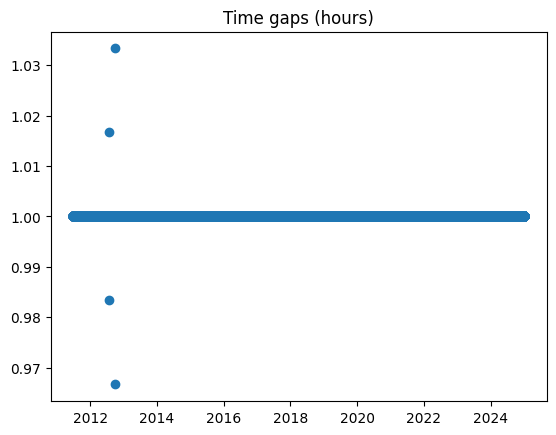

In [48]:
# Diff in hours
df['diff_hours'] = df['timestamp'].diff().dt.total_seconds() / 3600
print("Min diff_hours:", df['diff_hours'].min())
print("Max diff_hours:", df['diff_hours'].max())

# Optional: plot to see gaps
import matplotlib.pyplot as plt
plt.plot(df['timestamp'], df['diff_hours'], marker='o', linestyle='')
plt.title("Time gaps (hours)")
plt.show()


In [49]:
# Optional: check wind vector magnitude
import numpy as np
wind_u = df['wind_speed_kmh'] * np.cos(np.deg2rad(df['wind_dir_deg']))
wind_v = df['wind_speed_kmh'] * np.sin(np.deg2rad(df['wind_dir_deg']))
print("Wind u/v sanity check:", wind_u.min(), wind_u.max(), wind_v.min(), wind_v.max())


Wind u/v sanity check: -59.20063510951224 54.502172005582686 -100.45039080724521 45.30115663856157


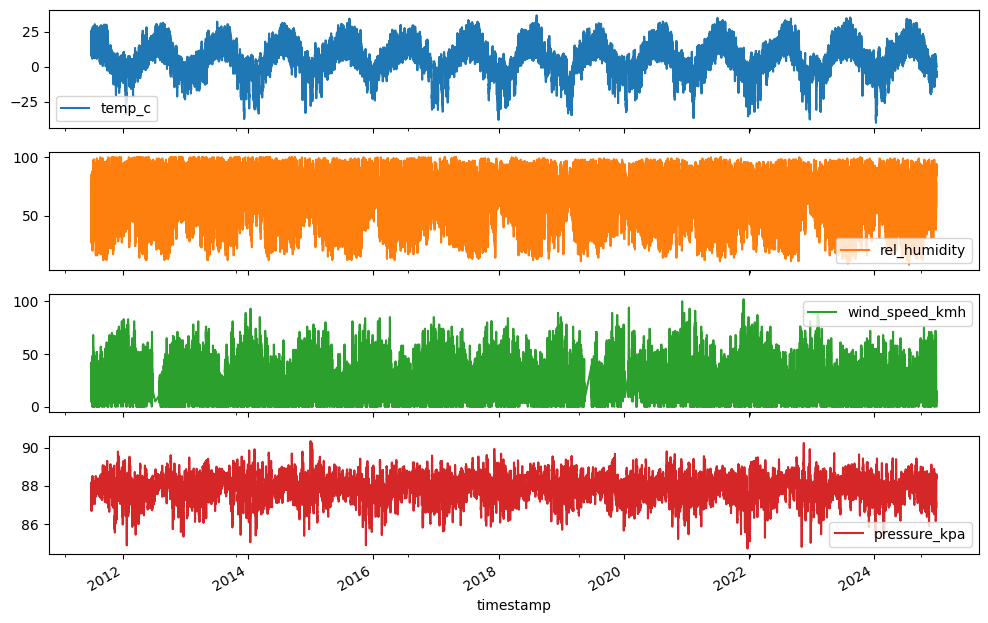

In [50]:
df.set_index('timestamp')[['temp_c','rel_humidity','wind_speed_kmh','pressure_kpa']].plot(subplots=True, figsize=(12,8))
plt.show()


In [51]:
# Check for exact duplicate rows
print("Exact duplicate rows:", df.duplicated().sum())

# Check for duplicates based only on datetime (should be unique)
print("Duplicate datetime entries:", df.duplicated(subset=['timestamp']).sum())

# Show duplicated datetime entries (if any)
duplicated_datetimes = df[df.duplicated(subset=['timestamp'], keep=False)]
print("\nDuplicated datetime records (if any):")
print(duplicated_datetimes.sort_values('timestamp').head(20))

# Check for near-duplicates in datetime (e.g., same minute)
df['timestamp_rounded'] = pd.to_datetime(df['timestamp']).dt.round('min')
print("\nRows with same rounded minute:", df.duplicated(subset=['timestamp_rounded']).sum())

# Optional: inspect time gaps for irregular sampling
df_sorted = df.sort_values('timestamp').copy()
df_sorted['time_diff'] = pd.to_datetime(df_sorted['timestamp']).diff()
print("\nMost common time intervals:")
print(df_sorted['time_diff'].value_counts().head())


Exact duplicate rows: 0
Duplicate datetime entries: 0

Duplicated datetime records (if any):
Empty DataFrame
Columns: [temp_c, rel_humidity, wind_speed_kmh, pressure_kpa, timestamp, diff_hours, wind_dir_deg]
Index: []

Rows with same rounded minute: 0

Most common time intervals:
time_diff
0 days 01:00:00    118469
0 days 01:01:00         1
0 days 00:59:00         1
0 days 01:02:00         1
0 days 00:58:00         1
Name: count, dtype: int64


In [54]:
df = df.drop(columns=['diff_hours'])


In [56]:
df = df.set_index('timestamp')
df.index = pd.to_datetime(df.index)  # ensure it’s a DatetimeIndex


In [57]:
# 1. Ensure datetime index is sorted (already done, but safe to confirm)
assert df.index.is_monotonic_increasing, "Datetime index is not sorted!"

# 2. Calculate time differences between consecutive rows
time_diffs = df.index.to_series().diff()

# 3. Show unique time intervals and their frequencies
print("Most common time intervals:")
print(time_diffs.value_counts().head(10))

# 4. Check for unexpected gaps (e.g., > 15 minutes)
expected_freq = pd.Timedelta(minutes=10)  # adjust if your data has different freq
large_gaps = time_diffs[time_diffs > pd.Timedelta(minutes=15)]
print(f"\nNumber of large gaps (>15 min): {len(large_gaps)}")
if len(large_gaps) > 0:
    print("First few large gaps:")
    print(large_gaps.head())

# 5. Check for duplicate timestamps
duplicated_times = df.index.duplicated()
print(f"\nNumber of duplicate timestamps: {duplicated_times.sum()}")


Most common time intervals:
timestamp
0 days 01:00:00    118469
0 days 01:01:00         1
0 days 00:59:00         1
0 days 01:02:00         1
0 days 00:58:00         1
Name: count, dtype: int64

Number of large gaps (>15 min): 118473
First few large gaps:
timestamp
2011-06-27 15:00:00   0 days 01:00:00
2011-06-27 16:00:00   0 days 01:00:00
2011-06-27 17:00:00   0 days 01:00:00
2011-06-27 18:00:00   0 days 01:00:00
2011-06-27 19:00:00   0 days 01:00:00
Name: timestamp, dtype: timedelta64[ns]

Number of duplicate timestamps: 0


In [58]:
expected_freq = pd.Timedelta(hours=1)  # correct for your dataset
large_gaps = time_diffs[time_diffs > expected_freq]
print(f"\nNumber of large gaps (>1 hour): {len(large_gaps)}")
if len(large_gaps) > 0:
    print("First few large gaps:")
    print(large_gaps.head())



Number of large gaps (>1 hour): 2
First few large gaps:
timestamp
2012-07-23 23:01:00   0 days 01:01:00
2012-09-25 13:02:00   0 days 01:02:00
Name: timestamp, dtype: timedelta64[ns]


Basic statistics:
              temp_c   rel_humidity  wind_speed_kmh   pressure_kpa  \
count  118474.000000  118474.000000   118474.000000  118474.000000   
mean        5.448094      64.196997       21.317821      87.913841   
min       -40.000000       8.000000        0.000000      84.710000   
25%        -0.700000      49.000000       11.000000      87.510000   
50%         5.700000      65.000000       17.000000      87.960000   
75%        12.900000      82.000000       30.000000      88.350000   
max        36.500000     100.000000      102.000000      90.350000   
std        11.156834      20.657988       13.776097       0.652857   

        wind_dir_deg              timestamp_rounded  
count  118474.000000                         118474  
mean      227.494018  2018-03-30 18:30:00.001519360  
min         0.000000            2011-06-27 14:00:00  
25%       200.000000            2014-11-12 16:15:00  
50%       260.000000            2018-03-30 18:30:00  
75%       270.000000       

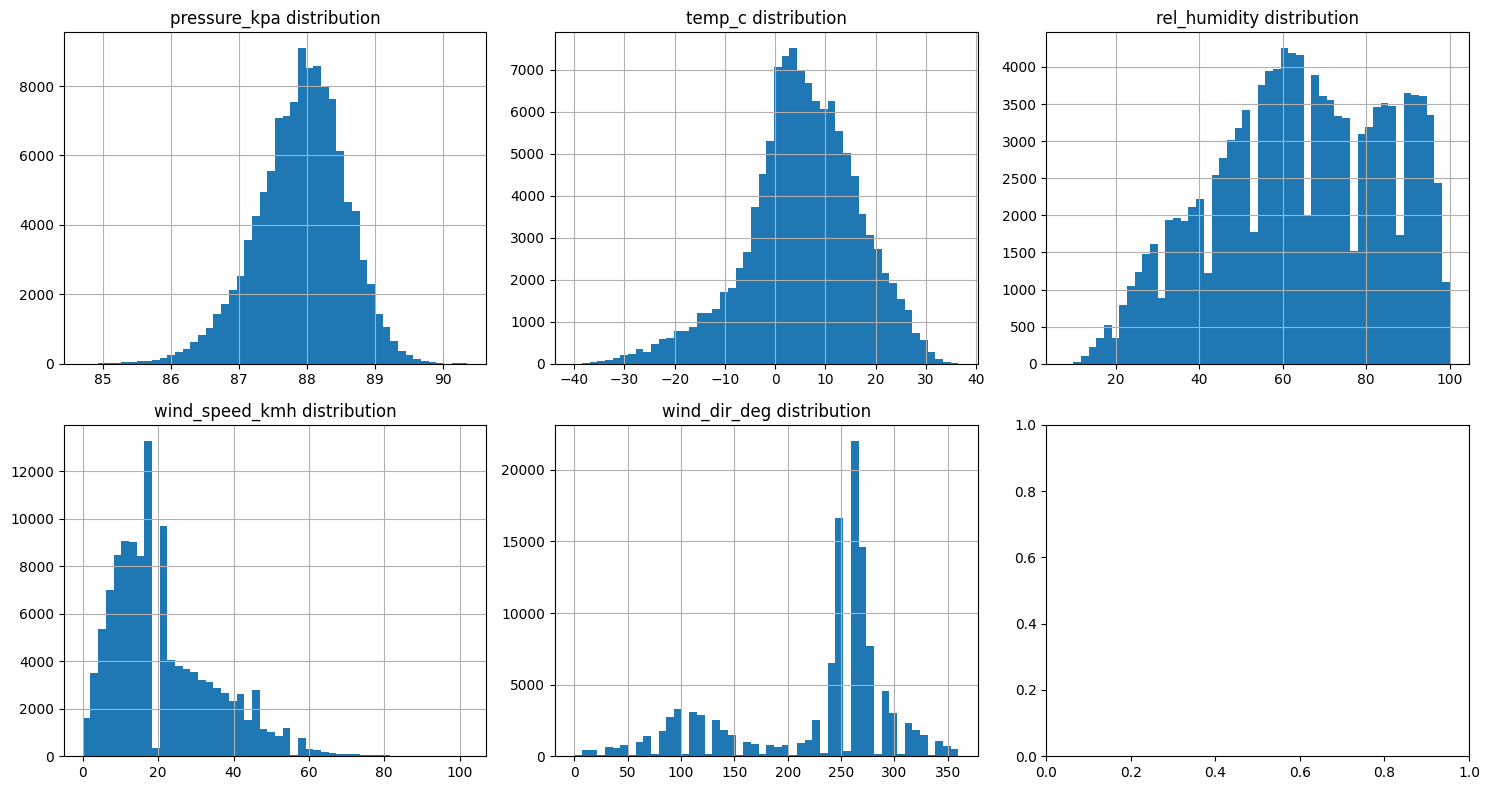


Percentage of zero wind speed readings: 1.35%
Wind direction = 0: 38 times
Wind direction = 360: 466 times


In [59]:
# 1. Basic statistics and distributions
print("Basic statistics:")
print(df.describe())

# 2. Check lag-1 autocorrelation (should be high for weather data)
print("\nLag-1 autocorrelation (should be >0.8 for temp/pressure/humidity):")
autocorr = df[['pressure_kpa', 'temp_c', 'rel_humidity', 'wind_speed_kmh']].apply(lambda x: x.autocorr(lag=1))
print(autocorr)

# 3. Plot histograms to spot anomalies
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
cols = ['pressure_kpa', 'temp_c', 'rel_humidity', 'wind_speed_kmh', 'wind_dir_deg']
for i, col in enumerate(cols):
    ax = axes[i//3, i%3]
    df[col].hist(bins=50, ax=ax)
    ax.set_title(f'{col} distribution')
plt.tight_layout()
plt.show()

# 4. Check for excessive zero wind speed (calm periods are normal, but 100% zeros = sensor issue)
zero_wind_pct = (df['wind_speed_kmh'] == 0).mean() * 100
print(f"\nPercentage of zero wind speed readings: {zero_wind_pct:.2f}%")

# 5. Wind direction: should be roughly uniform or bimodal (prevailing directions)
# Check if too many 0s or 360s (possible default/fill value)
wind_dir_zeros = (df['wind_dir_deg'] == 0).sum()
wind_dir_360 = (df['wind_dir_deg'] == 360).sum()
print(f"Wind direction = 0: {wind_dir_zeros} times")
print(f"Wind direction = 360: {wind_dir_360} times")


In [60]:
import numpy as np

# 1. Convert Meteorological Degrees to Radians for Math
# Formula: (270 - degrees) aligns Meteo North (0) to Math North (90)
wd_rad = np.deg2rad(270 - df['wind_dir_deg'])

# 2. Calculate U and V
# U = East-West component, V = North-South component
df['u'] = df['wind_speed_kmh'] * np.cos(wd_rad)
df['v'] = df['wind_speed_kmh'] * np.sin(wd_rad)


/tmp/ipykernel_95715/563268950.py:21: FutureWarning: last is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  last_30d = df.last('30D')


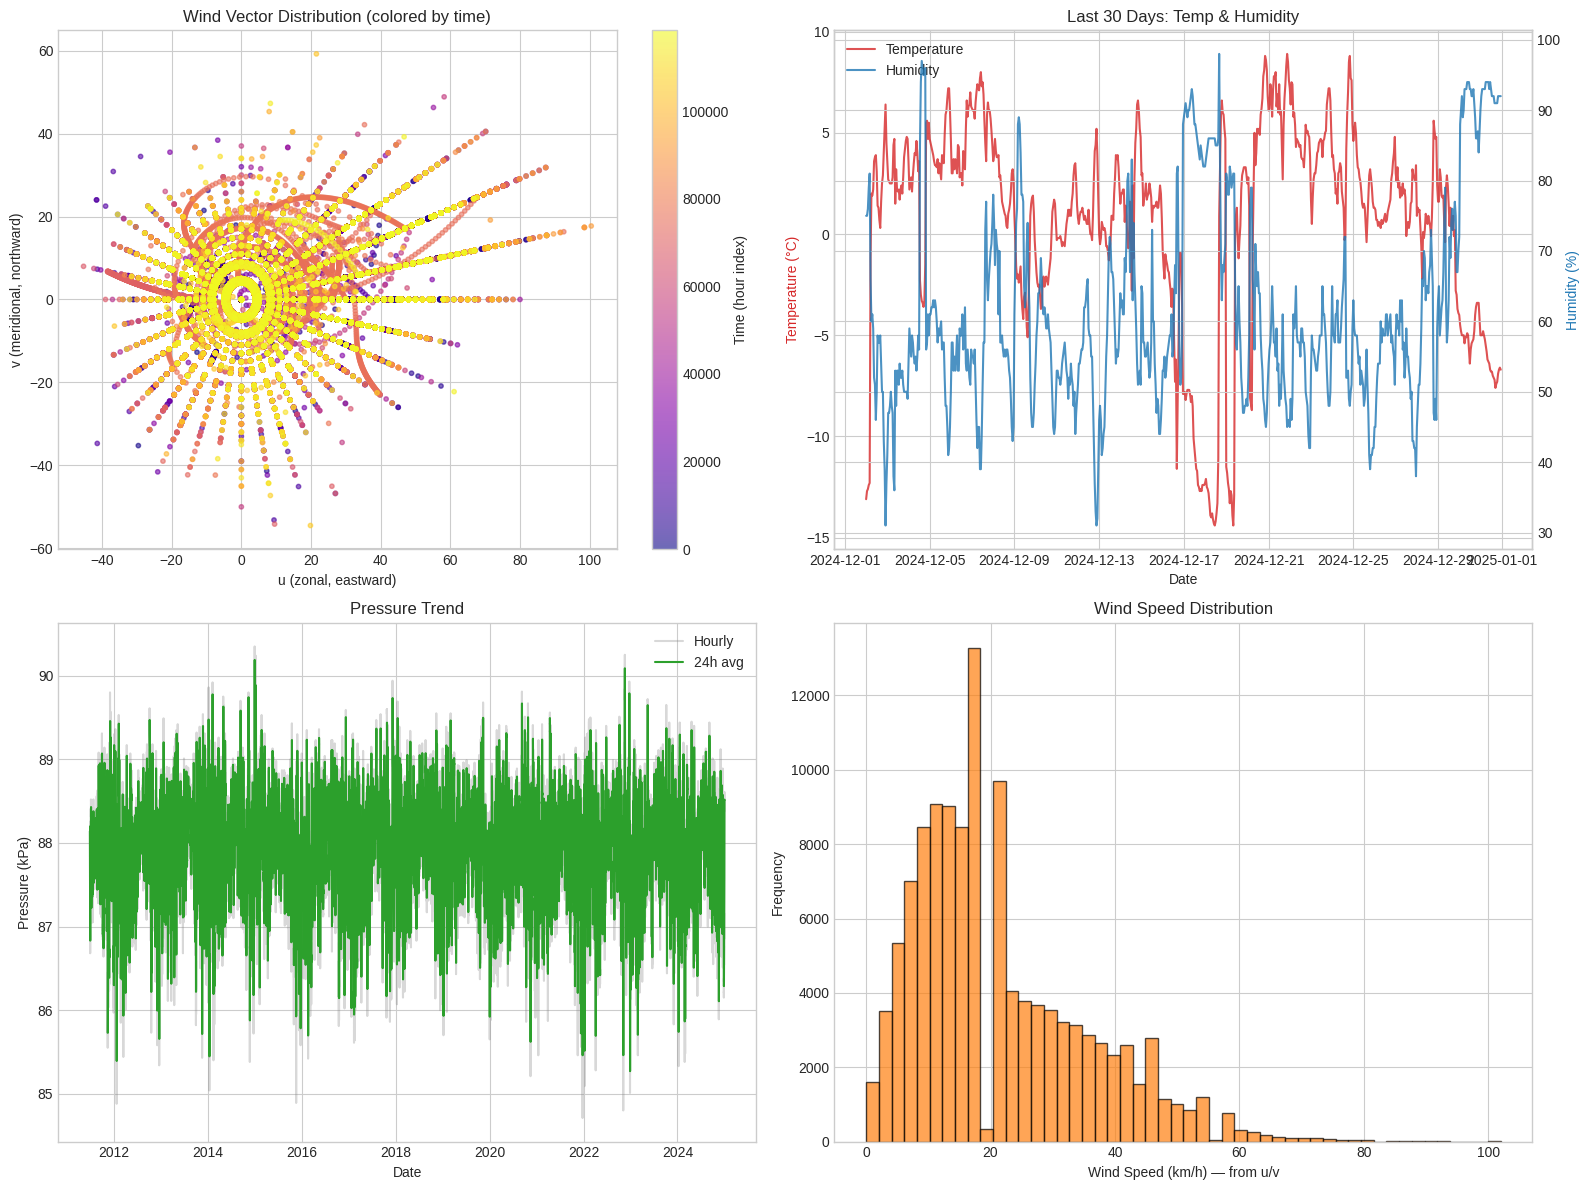

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("tab10")

# Create figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Wind vectors over time (u vs v scatter + time color)
sc = axes[0, 0].scatter(df['u'], df['v'], 
                        c=range(len(df)), cmap='plasma', alpha=0.6, s=10)
axes[0, 0].set_xlabel('u (zonal, eastward)')
axes[0, 0].set_ylabel('v (meridional, northward)')
axes[0, 0].set_title('Wind Vector Distribution (colored by time)')
plt.colorbar(sc, ax=axes[0, 0], label='Time (hour index)')

# 2. Temperature and humidity over time (last 30 days example)
last_30d = df.last('30D')
ax2 = axes[0, 1].twinx()
ln1 = axes[0, 1].plot(last_30d.index, last_30d['temp_c'], 
                      color='tab:red', label='Temperature', alpha=0.8)
ln2 = ax2.plot(last_30d.index, last_30d['rel_humidity'], 
               color='tab:blue', label='Humidity', alpha=0.8)
axes[0, 1].set_xlabel('Date')
axes[0, 1].set_ylabel('Temperature (°C)', color='tab:red')
ax2.set_ylabel('Humidity (%)', color='tab:blue')
axes[0, 1].set_title('Last 30 Days: Temp & Humidity')
lines = ln1 + ln2
labels = [l.get_label() for l in lines]
axes[0, 1].legend(lines, labels, loc='upper left')

# 3. Pressure trend (with 24h rolling mean)
df['pressure_24h'] = df['pressure_kpa'].rolling(window=24, min_periods=1).mean()
axes[1, 0].plot(df.index, df['pressure_kpa'], alpha=0.3, color='gray', label='Hourly')
axes[1, 0].plot(df.index, df['pressure_24h'], color='tab:green', label='24h avg')
axes[1, 0].set_xlabel('Date')
axes[1, 0].set_ylabel('Pressure (kPa)')
axes[1, 0].set_title('Pressure Trend')
axes[1, 0].legend()

# 4. Wind speed distribution (from u/v)
wind_speed_from_uv = np.sqrt(df['u']**2 + df['v']**2)
axes[1, 1].hist(wind_speed_from_uv, bins=50, color='tab:orange', alpha=0.7, edgecolor='k')
axes[1, 1].set_xlabel('Wind Speed (km/h) — from u/v')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].set_title('Wind Speed Distribution')

plt.tight_layout()
plt.show()


In [ ]:
import os

# ===========================
# 6-d. EXPORT HOURLY CLEAN CSV
# ===========================
out_dir = '../../data/cleaned/'
os.makedirs(out_dir, exist_ok=True)  # ensure output directory exists

# Use a descriptive filename
output_file = 'pincher_station_hourly_wind_cleaned.csv'
output_path = os.path.join(out_dir, output_file)

# Save the cleaned dataframe
df.to_csv(output_path, index=True)  # keep timestamp index

print("✅ Multi-variate hourly clean file saved to:", output_path)
print("Shape written:", df.shape)
